In [9]:
using PyPlot
#using PGFPlots 
#using Winston


In [132]:
include("sim.jl"); #include the simulator 
include("floopMap.jl") #include mapping

Import successful: sim.jl
Import successful: floopMap.jl


state = ind2eval(stateInd,stateMap) => {60,-50,-10,-5,-55}
action = ind2eval(actionInd,actionMap) => {-5,-5,-5,0,-5}
newState = ind2eval(newStateInd,stateMap) => {55,-55,-15,-5,-60}
Generated Arm wth 5 segments
Generated Arm wth 5 segments
no self collsions founds
no obstacle collsions founds


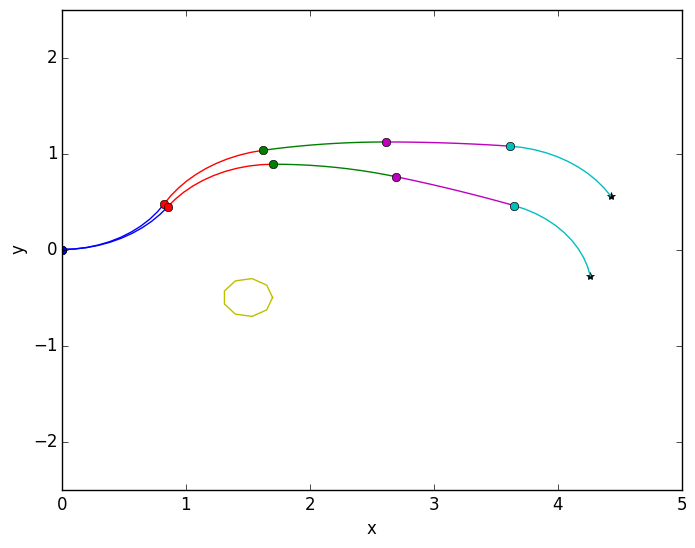

(-2.5,2.5)

In [152]:
#defne parameters
nSeg=5 #number of segments
step=5 #angle step 
res=10 #resolution of segment 
l=1/res #set subsegment lenght so that segment lenght =1

#make maps
stateMap=makeMap([-60:step:60], nSeg)
actionMap=makeMap([-step:step:step], nSeg)

#set state
stateInd=rand(1:stateMap.nSize)
actionInd=rand(1:actionMap.nSize)

@show state=ind2eval(stateInd, stateMap)
@show action=ind2eval(actionInd, actionMap)


newStateInd=detTrans(stateInd, actionInd, stateMap, actionMap)
@show newState=ind2eval(newStateInd, stateMap)

##make arm 
(arm,edges,t)=ccArm2(map(deg2rad, state), res, l);
drawArm(arm, edges, res)

(arm,edges,t)=ccArm2(map(deg2rad, newState), res, l);
drawArm(arm, edges, res)




##check self collide
col=selfCollide(arm, .060)

##make obs
c=[1.5 -.5]
r=.2
drawObs(Obs(c, r))
#check obs collision
obsCollide(arm, Obs(c, r), 1.1)

#ploted for style
pmax=maximum(abs(arm))*1.1
#plot(p[:, 1],p[:, 2])
xlabel("x")
ylabel("y")
xlim(-0, 5)
ylim(-2.5, 2.5)
#savefig("arm.png")

In [122]:
@show stateMap.nSize
@show actionMap.nSize

stateMap.nSize => 9765625
actionMap.nSize => 243


243

In [129]:
rand(3)

3-element Array{Float64,1}:
 0.741431 
 0.112983 
 0.0110828

In [23]:
a=int64(ones(5)*25)
b=tuple(a...)

(25,25,25,25,25)

In [88]:
sub2ind((25, 25, 25, 25, 25), (15, 2, 1, 1, 1))

LoadError: `sub2ind` has no method matching sub2ind(::(Int64,Int64,Int64,Int64,Int64), ::(Int64,Int64,Int64,Int64,Int64))
while loading In[88], in expression starting on line 1

In [ ]:
nStates=41^n
value=zeros(nStates)
tic()
for i=1:nStates
    value[i]+=1
end
toc()

In [ ]:
function smash(e)
	n=size(e,1)
	e=e'
	#checks for colisions 
	for i=1:(n-2)
		for j=(i+1):(n-1)
			t=inv(hcat(e[:,i+1]-e[:,i], e[:,j+1]-e[:,j]))*e[:,i]-e[:,j]
			col=vcat(t.<0,t.>1 )
			if norm(col)==0
				return e[:,i]+t[1]*(e[:,i+1]-e[:,i])
			end
		end	
	end
    return 0
end

In [ ]:
smash(e)

In [ ]:
#defne parameters
l=1 #segment len
n=10 #number of segments 
res=1000
#k=[.4 -1 1 1 1]
gain=2
pdif=rand(n)*gain
#pdif=ones(n)*1
(p,t)=cantArm(pdif, res, l, 1);
gcol=["b","r", "g", "m", "c", "b","r", "g", "m", "c"]
plot([p[end,1]],[p[end, 2]], "k*")
#plot([p[:,1]],[p[:, 2]], "k")
for i=1:n
    inx=(i-1)*res+1
    plot(p[inx:inx+res, 1],p[inx:inx+res, 2], gcol[i])
end
#plot(p[:, 1],p[:, 2])
xlabel("x")
ylabel("y")
#xlim(0, 13)
#ylim(-3, 3 )
#savefig("arm.png")

In [ ]:
function TestccSeg(k, res, l=1)
    t=linspace(0, k*l, res+1) #calcuate angle change
    p=zeros(res+1, 2)
    y=zeros(res+1)
    for i=1:res 
        p[i+1, 1]=p[i, 1]+(sin(t[i+1])-sin(t[i]))/k #update x 
        p[i+1, 2]=p[i, 2]+(-cos(t[i+1])+cos(t[i]))/k #update y
    end
    return (p[:, 1], p[:, 2], t[end])
end

In [ ]:
(x, y, t)=ccSeg(5, 100, 1)
plot(x, y)

In [ ]:
plot(t,"k*")


In [ ]:
x=[0:.1:1]
y=zeros(length(x))
t=zeros(length(x))
for i=1:length(x)
    y[i]=deflec(x[i], 1)
    t[i]=curv(x[i], 1)
end
plot(x,y)